# Data Viz Challenge: Mapping Wiley's Audience Against Research Output


## Instructions (summary)

**1. Locate the company data that you will use**
- Make sure your data is in a usable state. 

**2. Check your organisational style guidelines**
- Find out if there are any lists on approved or non-approved colours
- Find out if there are certain graphs or charts that are allowed or not allowed in company documents

**3. Create a range of graphs (aim for a minimum of 3) of the data you located that is acceptable based on your company style guidelines**
 - The visualisation should communicate a main message that you have found in the data
 - The visualisation should be appropriate for your intended target audience and the type of data you are using.
 - Try to choose approved brand guidelines that are also accessible for people with visual impairments (i.e. alt-text etc).
 - Feel free to also evidence visualisations that you have created recently for a specific stakeholder and reflect on the above for your example.

## Step 1: Select & clean the data

### 1a) Source and combine the following data for Wiley Online Library L2 and L3 subject areas:

- Articles published (Dimensions) 
- Page views (Adobe Analytics) 
- Unique users (Adobe Analytics)
- ePDF views (Adobe Analytics)
- Mailing List subscribers (Adobe Campaign)

Potential additional metrics to explore:
- Wiley % market share in published papers (Dimensions)
- Wiley CAGR in published papers, CY2019-2023 (Dimensions, calculated)
Note that Wiley % market share is not available for WOL L2 Subject area, so this would have to be mapped from other subject area taxonomies (Dimensions FOR) 

Year == 2023 for all data above, except for CAGR 

Combine into a CSV file

### 1b) Clean the data

- Removed totals and category 'unspecified' in Adobe Analytics
- Combined first 5 metrics noted above using XLOOKUP (100% matches for papers against Adobve Analytics web traffic numbers, but there were some subject mailing lists that didn't have any subscribers within a subject area)
- There were relatively few missing values, and I chose to keep 0s for those instead of using fillna in Python because I knew I wanted to look at the correlations between different metrics - there may be a better way to do this, but .corr throws errors for any rows with NaNs
- Partway through I realised that the 1,000 separators from the CSV files meant I couldn't convert the strings to integers, so I went back to the source CSV file, removed the 1,000 separators, and loaded the data and worked through the steps again

## Step 2: examine the data to find patterns and correlations

In [4]:
# First, we import the packages

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Then, we import the data

verticals = pd.read_csv("verticals.csv")

In [6]:
# Sample to see that the data looks as expected

verticals.head()

,WOL L2 Subject,Wiley Papers,Unique Visitors,Page Views,ePDF Views,Mailing List Subscribers
0,Materials Science,10508,14612560,108276834,16721554,20618
1,General & Introductory Chemistry,7253,8284404,65063710,11827434,41309
2,Earth Sciences,5573,9372019,42990142,6458841,24314
3,Electrical & Electronics Engineering,3612,3322269,11967947,1501960,25742
4,Ecology,3375,8852712,40704443,4890562,7957


In [7]:
# Check properties of dataframe to see whether any values need to be converted
# Note, as you can see from the number of times I ran cells in this notebook, this is the point in time when I realised that
# numbers in a CSV/Excel file containing 1,000 separators will not be read correctly! I'll never forget it :D

verticals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   WOL L2 Subject            119 non-null    object
 1   Wiley Papers              119 non-null    int64 
 2   Unique Visitors           119 non-null    int64 
 3   Page Views                119 non-null    int64 
 4   ePDF Views                119 non-null    int64 
 5   Mailing List Subscribers  119 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 5.7+ KB


In [8]:
# Use .corr to find the pairwise correlation of all columns containing numerical data in the dataframe
# Note: NaN values will be excluded

verticals.drop(columns = ['WOL L2 Subject']).corr()

,Wiley Papers,Unique Visitors,Page Views,ePDF Views,Mailing List Subscribers
Wiley Papers,1.000000,0.776792,0.924688,0.945624,0.427854
Unique Visitors,0.776792,1.000000,0.897709,0.823355,0.638306
Page Views,0.924688,0.897709,1.000000,0.982716,0.536326
ePDF Views,0.945624,0.823355,0.982716,1.000000,0.476390
Mailing List Subscribers,0.427854,0.638306,0.536326,0.476390,1.000000


## Step 3: start visualizing

<Axes: >

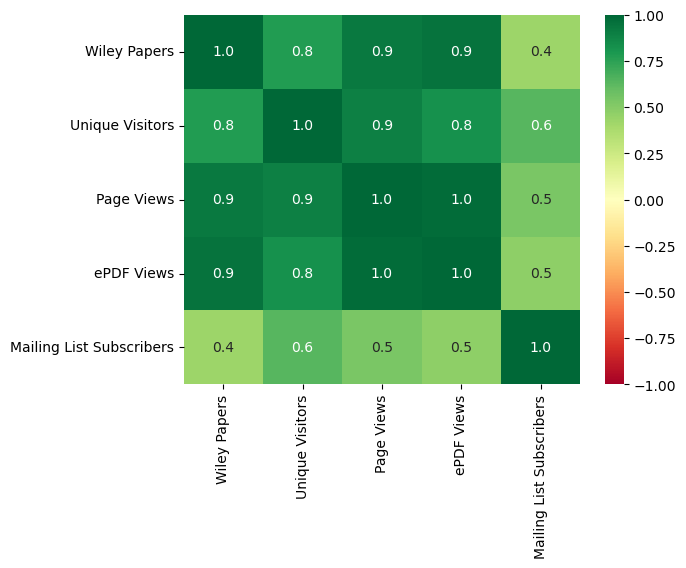

In [9]:
# And now we're going to create a heatmap of these correlations 

corr_table = verticals.drop(columns = ['WOL L2 Subject']).corr()

sns.heatmap(data = corr_table,
            annot = True,
            fmt = '.1f',
            cmap = 'RdYlGn',
            vmin = -1, vmax = 1)

<Axes: xlabel='Wiley Papers', ylabel='Mailing List Subscribers'>

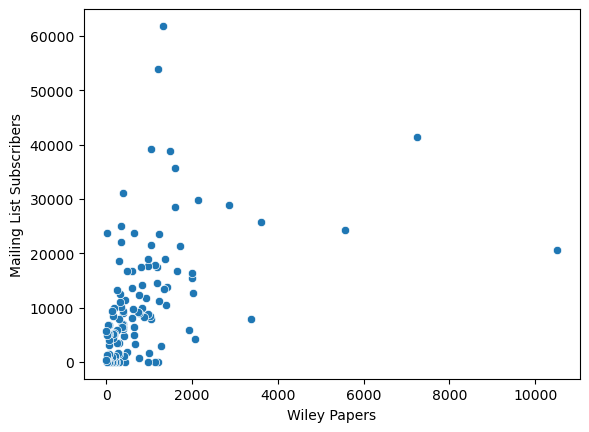

In [10]:
# And a scatterplot, to see what that looks like spatially. 
# Let's start by plotting one of the weaker correlations: Wiley Papers against Mailing List Subscribers

sns.scatterplot(data = verticals, 
               x = 'Wiley Papers', 
               y = 'Mailing List Subscribers')

In [11]:
# Okay, let's try using Plotly to add hover text to these dots
# Step 1: import Plotly Express

import plotly.express as px

In [21]:
# Step 2: chart it

px.scatter(data_frame = verticals, 
           x = 'Wiley Papers', 
           y = 'Mailing List Subscribers',
          hover_data = ['WOL L2 Subject'])

In [22]:
# Step 3: Add a trendline
# Note: I installed statsmodels and dependencies via Anaconda for this 

px.scatter(data_frame = verticals, 
          x = 'Wiley Papers', 
          y = 'Mailing List Subscribers',
          hover_data = ['WOL L2 Subject'],
          trendline="ols")

## Step 4: new visualizations - bubble charts in Plotly 

In [17]:
# Okay, let's attempt a new one for me - how about a bubble chart? *googles frantically*

px.scatter(data_frame = verticals,
           x="Wiley Papers",
           y="Unique Visitors",
           size="Mailing List Subscribers",
           hover_data=["WOL L2 Subject"],
           log_x=False,
           size_max=50)

In [18]:
# Great. After playing around with a few settings above, I'm pretty happy with this...
# But I want to see what it looks like when I swap the Y axis and bubble size, and color-code a new metric.

px.scatter(data_frame = verticals,
           x="Wiley Papers",
           y="Mailing List Subscribers",
           size="Unique Visitors",
           color = "Page Views",
           hover_data=["WOL L2 Subject"],
           log_x=False,
           size_max=50)